# Import modules

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mfe.from_txt import msi_from_txt, get_ref_peaks, create_feature_table
import re
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import pandas as pd

# Create feature table from the txt file

In [5]:
data_dir = r'/home/weimin/Data/2022_06_07_5000_0-4cm_A_150-400da.txt'
data = msi_from_txt(data_dir)
ref_peaks = get_ref_peaks(data, peak_th=0.3)
feature_table, err_table = create_feature_table(data, ref_peaks[0.3], normalization='median')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20148/20148 [00:54<00:00, 371.61it/s]


Detecting reference peaks with peak prominence greater than 0.3
Binning the spectrum...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20148/20148 [03:23<00:00, 98.77it/s]


Combining the binned spectrum...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20148/20148 [00:54<00:00, 372.05it/s]


# map the color of the image onto the laser spot

In [ ]:
spot_list = pd.read_csv('./guaymas/spot_list.csv')
spot_list['x'] = spot_list['spot-name'].apply(lambda x: int(re.findall(r'R00X(\d+)', x)[0]))
spot_list['y'] = spot_list['spot-name'].apply(lambda x: int(re.findall(r'Y(\d+)', x)[0]))
spot_c = spot_list[['x', 'y','c']]
feature_table = feature_table.merge(spot_c, on=['x', 'y'])

# calculate the off-over-on sample ratio for each spot

In [ ]:
off_sample = feature_table[feature_table['c'] == 0].drop(['x', 'y'], axis=1)
on_sample = feature_table[feature_table['c'] != 0].drop(['x', 'y'], axis=1)

off_over_on = off_sample.sum(axis=0) / (off_sample.sum(axis=0) + on_sample.sum(axis=0))

In [27]:
off_over_on.sort_values()

c           0.000000
153.2608    0.042257
271.0607    0.081700
276.1027    0.084937
278.1188    0.085910
              ...   
283.264     0.318612
282.2521    0.360033
284.2683    0.383883
311.1769    0.406422
279.2328    0.454560
Length: 777, dtype: float64

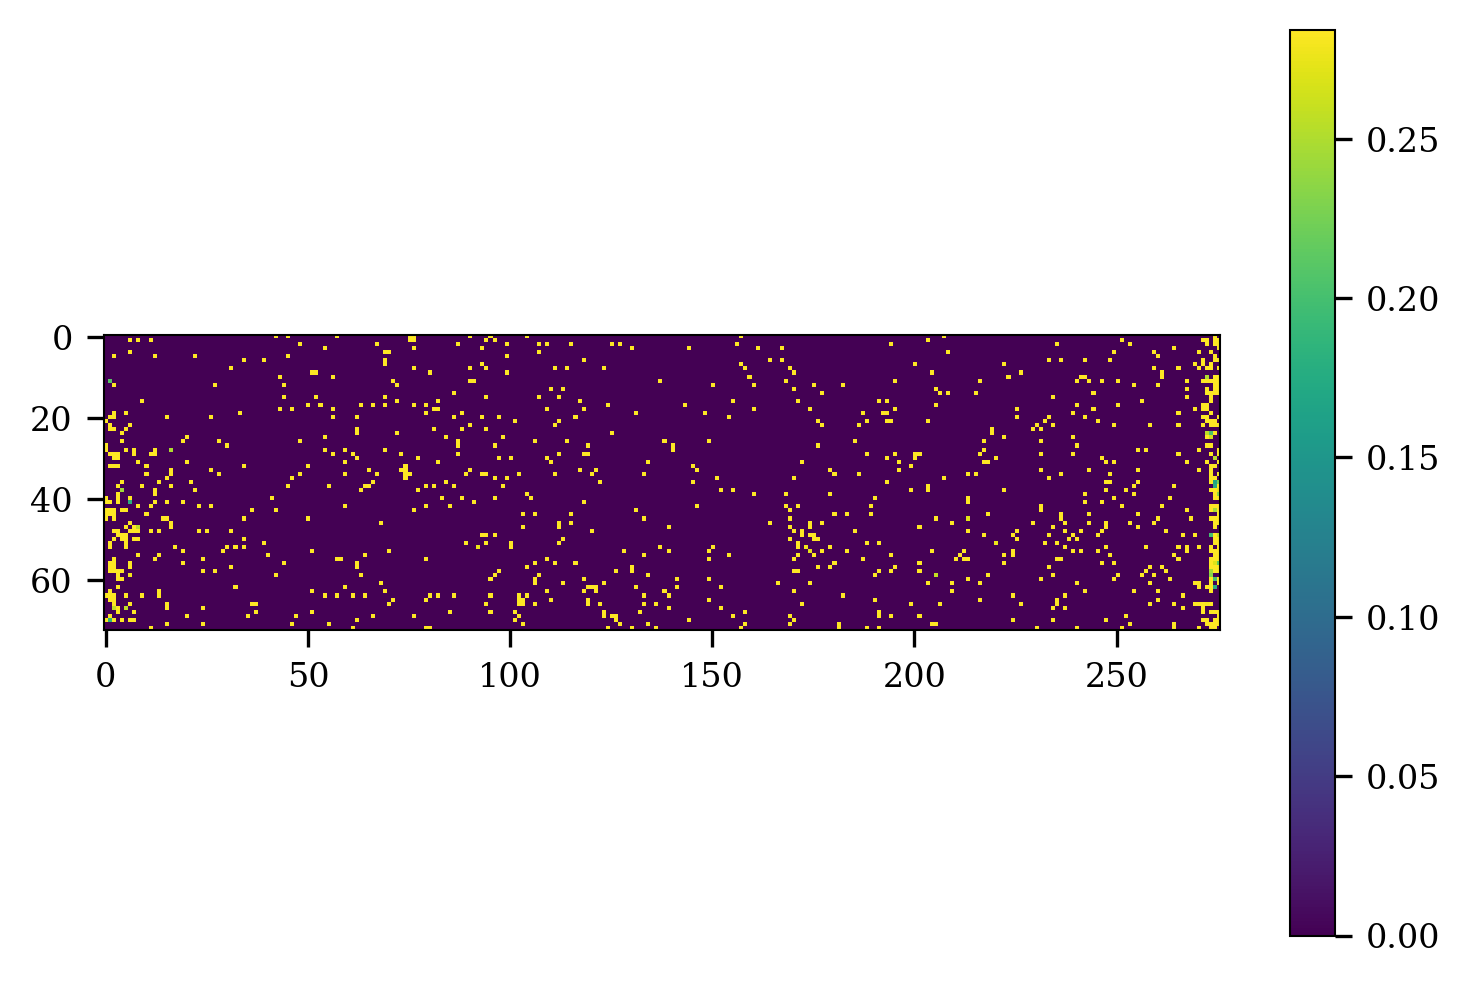

In [40]:

# spar = (feature_table == 0).astype(int).sum(axis=0) / len(feature_table)
# spar = pd.DataFrame(spar, index=feature_table.columns)
#
mz = 282.2521
plt.imshow(feature_table.pivot(index='y',columns='x',values=mz),vmin=feature_table[mz].quantile(0.05),vmax=feature_table[mz].quantile(0.95), interpolation='None')
plt.colorbar()
#
# scaled_feature_table = MinMaxScaler().fit_transform(feature_table.iloc[:,0:-2])
# pca = PCA()
# comp = pca.fit_transform(scaled_feature_table)
# load = pd.DataFrame(pca.components_.T, index=feature_table.iloc[:,0:-2].columns)
# print(pca.explained_variance_ratio_*100)
# comp = pd.DataFrame(comp)
# comp['x'] = feature_table['x']
# comp['y'] = feature_table['y']
# c = 9
# plt.imshow(comp.pivot(index='x',columns='y',values=c),vmax=comp[c].quantile(0.95), vmin=comp[c].quantile(0.05))
# plt.savefig('163.png', dpi=300)
# plt.show()